## Simple Liner Regression
- Easy to understand
- Supervised 
- Output: Numeric

- Simple linear regression is a statistical method used to model the relationship between a dependent variable and one independent variable. The goal of this technique is to find a linear relationship between the two variables, which can be used to predict the dependent variable based on the value of the independent variable. The relationship is represented by a straight line known as the regression line, which is determined by the equation:

- y = mx + c
    - m: Slope(angle) -  Slope of the regression line (the change in y for a one-unit change in x).
    - c: Intercept - y-intercept of the regression line (the value of y when 𝑥=0).
    - x: Input: Independent variable (the predictor variable).
    - y: Output - Dependent variable (the variable we are trying to predict).
    
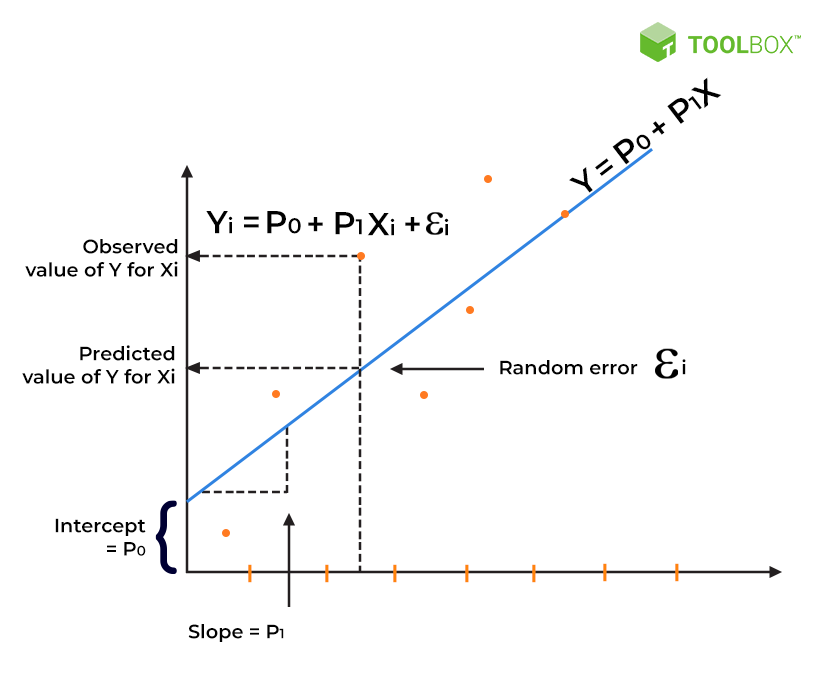

Linear regression (LR) can be categorized into several types based on the nature and number of the independent variables involved and the specific requirements of the data. Here are the main types:

### 1. Simple Linear Regression
This type of regression involves one dependent variable and one independent variable. It aims to find a linear relationship between the two variables.

**Equation:**
$$ y = \beta_0 + \beta_1 x + \epsilon $$

### 2. Multiple Linear Regression
This type involves one dependent variable and two or more independent variables. It aims to model the relationship between the dependent variable and multiple independent variables.

**Equation:**
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### 3. Polynomial Regression
A form of regression where the relationship between the independent variable and the dependent variable is modeled as an \( n \)-th degree polynomial. This is useful for capturing non-linear relationships.

**Equation:**
$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \epsilon $$

### 4. Ridge Regression (L2 Regularization)
A type of linear regression that includes a regularization term to prevent overfitting by shrinking the coefficients. It is particularly useful when dealing with multicollinearity.

**Equation:**
$$ \text{Minimize } \left( \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right) $$

### 5. Lasso Regression (L1 Regularization)
Similar to ridge regression, but uses an L1 regularization term, which can shrink some coefficients to zero, effectively performing variable selection.

**Equation:**
$$ \text{Minimize } \left( \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right) $$

### 6. Elastic Net Regression
Combines both L1 and L2 regularization terms. It is useful when there are multiple features that are correlated with each other.

**Equation:**
$$ \text{Minimize } \left( \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2 \right) $$

### 7. Stepwise Regression
A method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. This can involve adding or removing predictors based on their statistical significance.


# LR Code

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/Users/harishrathuri/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.shape

(200, 2)

## Split X & y variables
- X: Independent variable
- y: Dependent variable

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:, -1]

In [5]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [6]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

## Scatter plot

Text(0, 0.5, 'Package')

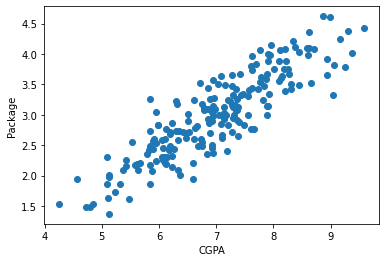

In [7]:
plt.scatter(X, y)
plt.xlabel("CGPA")
plt.ylabel("Package")

## Train test split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [10]:
X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [11]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

## Use LinearRegression model of sklearn

In [12]:
lr = LinearRegression()

## Model training

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

## Model Prediction

In [14]:
X_test.iloc[0]

cgpa    8.58
Name: 112, dtype: float64

In [15]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/Users/harishrathuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

## Draw line 

Text(0, 0.5, 'Package(in lpa)')

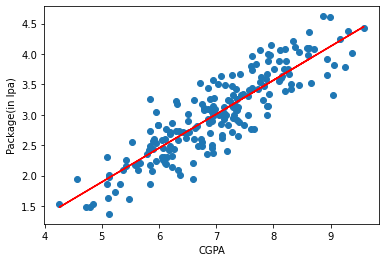

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train['cgpa'].values, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [17]:
type(X_train['cgpa'].values)

numpy.ndarray

In [18]:
type(lr.predict(X_train))


numpy.ndarray

## Model - Slope

In [19]:
lr.coef_

array([0.55795197])

## Model Intercept

In [20]:
lr.intercept_

-0.8961119222429144